# Exploring the Gutenberg project dataset

In [1]:
# Some necesary imports...
from collections import Counter
import pandas as pd
import requests
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import re
from gutenberg import Gutenberg

# The pre-processed catalog
open("catalog.csv", "wb").write(requests.get("https://drive.rezel.net/s/fHb3K9tRjkeQaL3/download/catalog2.csv").content)
catalog = pd.read_csv("catalog.csv")
# The post-processed catalog
g = Gutenberg()

/home/infres/labat-21/projetsd/projetsd/books2/gutenberg.py:6: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     /home/infres/labat-21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/infres/labat-21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using cached catalog...


  2%|███▌                                                                                                                                                                   | 318/14830 [00:01<01:17, 187.95it/s]

 19%|███████████████████████████████▍                                                                                                                                       | 2797/14830 [00:12<05:24, 37.08it/s]

 20%|████████████████████████████████▊                                                                                                                                     | 2933/14830 [00:13<01:48, 109.76it/s]

 31%|███████████████████████████████████████████████████▏                                                                                                                  | 4578/14830 [00:17<00:31, 324.07it/s]

 32%|████████████████████████████████████████████████████▋                                                                                                                 | 4708/14830 [00:18<00:32, 315.03it/s]

 35%|██████████████████████████████████████████████████████████▌                                                                                                           | 5235/14830 [00:20<00:27, 348.64it/s]

 40%|██████████████████████████████████████████████████████████████████▍                                                                                                   | 5940/14830 [00:22<00:23, 385.75it/s]

 43%|███████████████████████████████████████████████████████████████████████▌                                                                                              | 6388/14830 [00:23<00:21, 386.60it/s]

 44%|█████████████████████████████████████████████████████████████████████████▌                                                                                            | 6576/14830 [00:23<00:23, 355.94it/s]

 47%|█████████████████████████████████████████████████████████████████████████████▊                                                                                        | 6957/14830 [00:24<00:22, 354.96it/s]

 49%|█████████████████████████████████████████████████████████████████████████████████                                                                                     | 7237/14830 [00:25<00:20, 374.11it/s]

 49%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 7320/14830 [00:25<00:19, 391.68it/s]

 50%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 7444/14830 [00:26<00:18, 395.28it/s]

 51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 7607/14830 [00:26<00:18, 385.37it/s]

 53%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 7818/14830 [00:26<00:17, 394.35it/s]

 54%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 8010/14830 [00:27<00:19, 351.64it/s]

 55%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 8122/14830 [00:27<00:18, 362.60it/s]

 55%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 8203/14830 [00:28<00:17, 383.85it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 8327/14830 [00:28<00:16, 391.36it/s]

 57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 8448/14830 [00:28<00:16, 389.37it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 8532/14830 [00:28<00:15, 400.03it/s]

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 8690/14830 [00:29<00:16, 374.67it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 8773/14830 [00:33<02:23, 42.16it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 8898/14830 [00:33<00:58, 101.77it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 9058/14830 [00:38<02:29, 38.58it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 9160/14830 [00:38<01:05, 86.71it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 9249/14830 [00:39<00:36, 152.98it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 9489/14830 [00:39<00:16, 319.57it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 9654/14830 [00:40<00:13, 389.15it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 9909/14830 [00:40<00:12, 394.20it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 9991/14830 [00:40<00:12, 397.62it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 10152/14830 [00:41<00:11, 393.80it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 10415/14830 [00:42<00:10, 404.28it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 10578/14830 [00:42<00:11, 385.38it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 11805/14830 [00:48<00:07, 427.65it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 12028/14830 [00:48<00:06, 426.85it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 12286/14830 [00:49<00:06, 395.14it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 12456/14830 [00:49<00:05, 413.99it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 12673/14830 [00:50<00:05, 394.53it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 12861/14830 [00:50<00:04, 447.00it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 13655/14830 [00:52<00:02, 557.54it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14830/14830 [00:54<00:00, 271.47it/s]


Dataset & catalog are ready!


## Release date

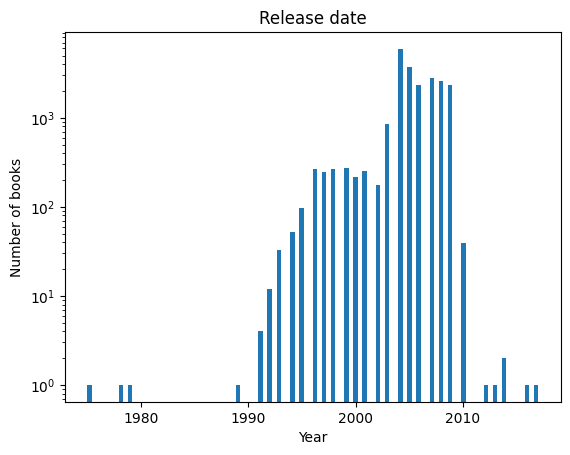

In [16]:
# the histogram of the data
dates = [int(x[:4]) for x in catalog.Issued]
counts, bins, _ = plt.hist(dates, bins=100)

plt.xlabel('Year')
plt.ylabel('Number of books')
plt.yscale('log')
plt.title('Release date')
plt.savefig("year.png")
plt.show()

## Subjects distribution

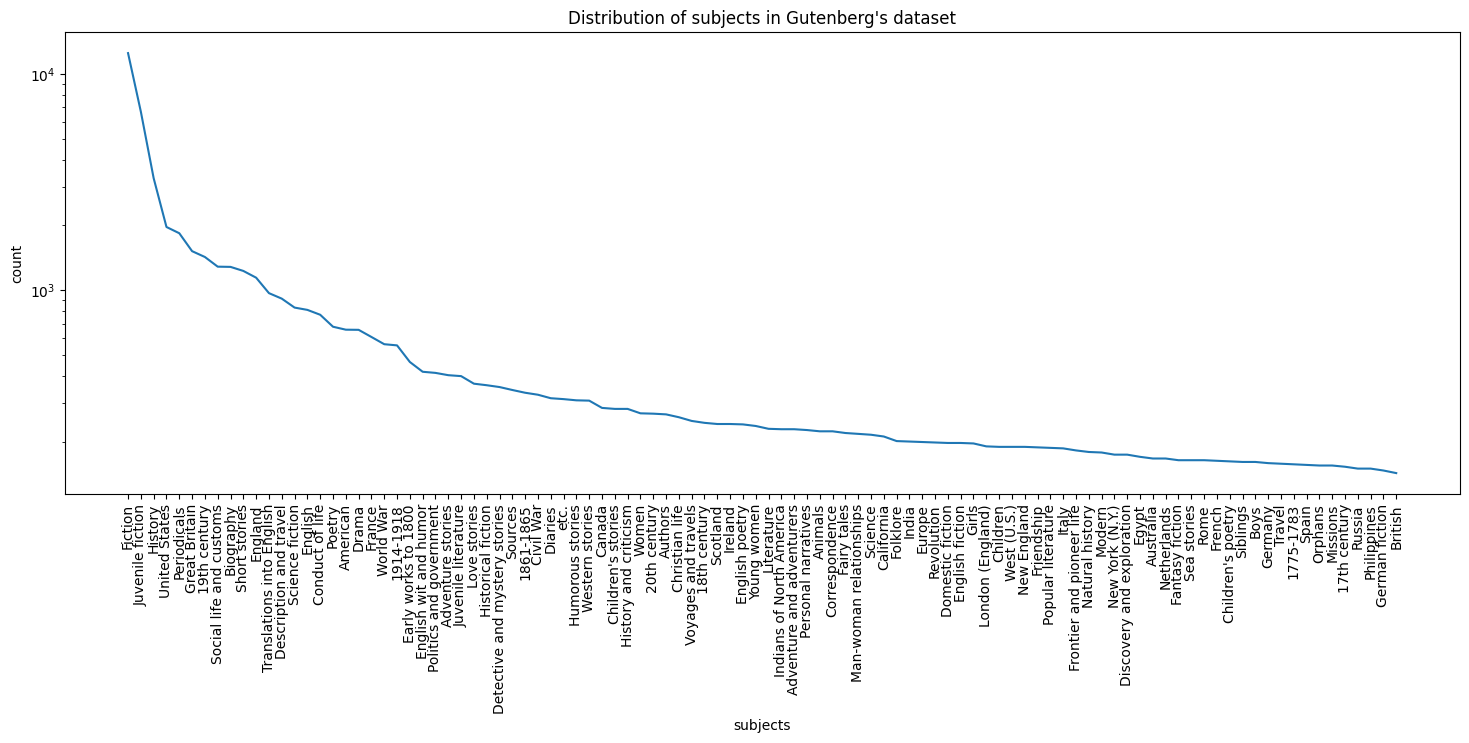

In [14]:
def subjectsListed(x):
    return list(map(lambda y: y.strip(), re.split('; |-- |,',x)))

def subjectsCount(lis):
    d = {}
    for i in lis:
        d[i] = 1 if i not in d.keys() else d[i] + 1
    return(d)

def applyLabels(x):
  a = []
  for i in labels:
    if(i in x):
      a.append(i)
  return a

labelsCatalog = catalog.copy()
labelsCatalog['Subjects'] = labelsCatalog['Subjects'].apply(subjectsListed)
subjectsLists = list(np.concatenate(labelsCatalog['Subjects'].tolist()).flat)
subjectDict = subjectsCount(subjectsLists)
orderedSubjects = sorted(subjectDict.items(),key=lambda x:x[1], reverse=True)
keys = []
counts = []
for i in range(0,100):
  keys.append(orderedSubjects[i][0])
  counts.append(orderedSubjects[i][1])

fig = plt.figure(figsize=(18,6))
plt.plot(keys,counts)
plt.title("Distribution of subjects in Gutenberg's dataset")
plt.yscale('log')
plt.xlabel('subjects')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.savefig("genres.png",bbox_inches='tight')

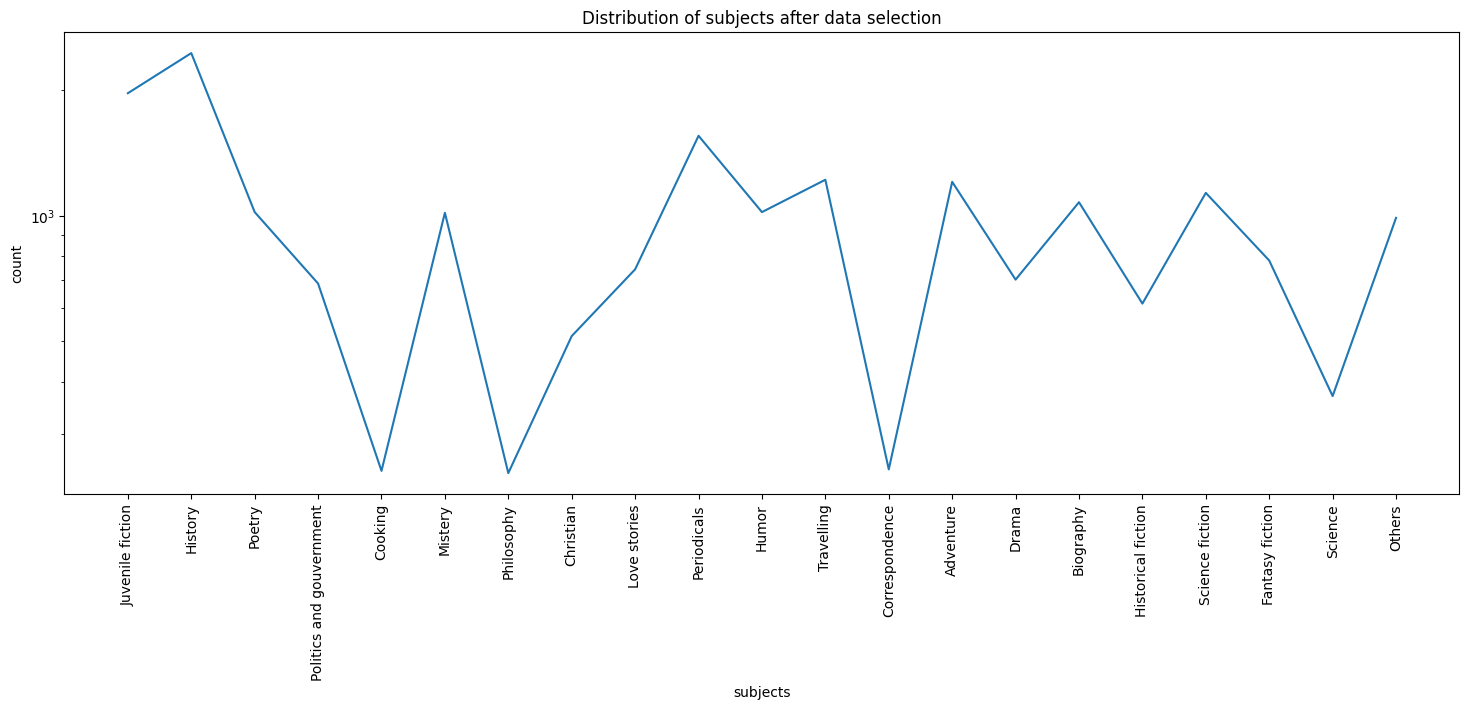

In [13]:
cat = g.getCatalog()
counts = []
keys = []
for c in cat:
    if (len(cat[cat[c]==1]) != 0):
        counts.append(len(cat[cat[c]==1]))
        keys.append(c)

fig = plt.figure(figsize=(18,6))
plt.plot(keys,counts)
plt.title("Distribution of subjects after data selection")
plt.xlabel('subjects')
plt.yscale('log')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.savefig("genres2.png",bbox_inches='tight')

## Book title uniqueness

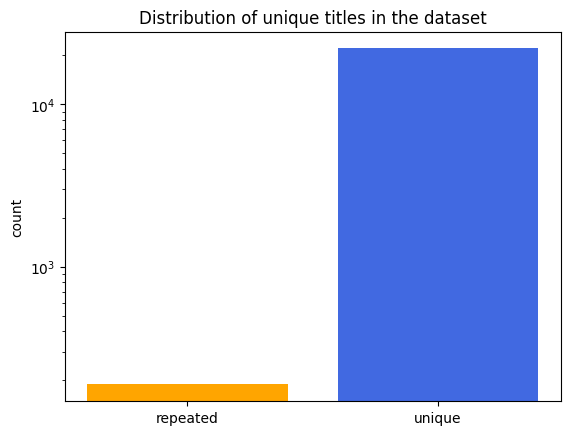

In [19]:
from collections import Counter
z = catalog.Title
repeated = 0
unique = 0
for k,v in dict(Counter(z)).items():
    if v==1:
        unique+=1
    else:
        repeated +=1
plt.bar(["repeated","unique"],[repeated,unique],color=["orange","royalblue"])
plt.title("Distribution of unique titles in the dataset")
plt.yscale('log')
plt.ylabel('count')
plt.savefig("repetitions.png",bbox_inches='tight')